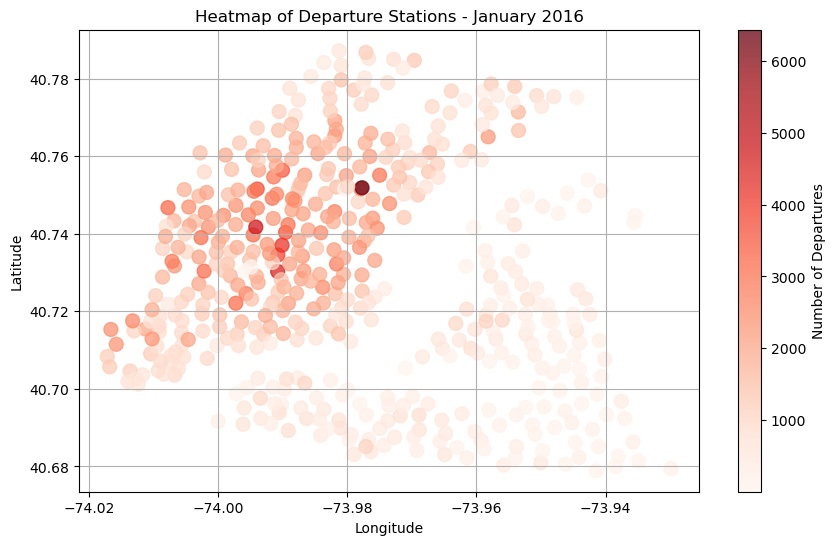

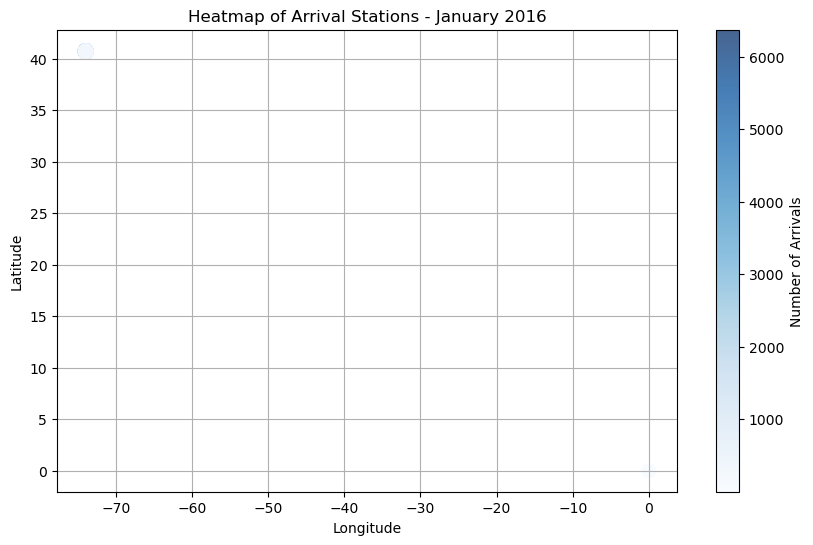

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd

# Charger les données
file_path = '201601-citibike-tripdata_1.csv'  # Remplacez par le chemin local du fichier
data = pd.read_csv(file_path)

# Convertir la colonne 'starttime' en datetime
data['starttime'] = pd.to_datetime(data['starttime'])

# Filtrer pour tout le mois de janvier
january_data = data[data['starttime'].dt.month == 1]

# Calculer les départs et arrivées
departure_counts = january_data.groupby(['start station id', 'start station latitude', 'start station longitude']).size().reset_index(name='departure_count')
arrival_counts = january_data.groupby(['end station id', 'end station latitude', 'end station longitude']).size().reset_index(name='arrival_count')

# Heatmap des départs
plt.figure(figsize=(10, 6))
plt.scatter(
    departure_counts['start station longitude'], 
    departure_counts['start station latitude'], 
    c=departure_counts['departure_count'], 
    cmap='Reds', 
    s=100, 
    alpha=0.75
)
plt.colorbar(label='Number of Departures')
plt.title('Heatmap of Departure Stations - January 2016')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Heatmap des arrivées
plt.figure(figsize=(10, 6))
plt.scatter(
    arrival_counts['end station longitude'], 
    arrival_counts['end station latitude'], 
    c=arrival_counts['arrival_count'], 
    cmap='Blues', 
    s=100, 
    alpha=0.75
)
plt.colorbar(label='Number of Arrivals')
plt.title('Heatmap of Arrival Stations - January 2016')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [5]:
# Vérifier les colonnes d'arrivées
print("Résumé des données des arrivées :")
print(data[['end station id', 'end station latitude', 'end station longitude']].info())

# Identifier les éventuelles valeurs manquantes
print("Valeurs manquantes dans les colonnes des arrivées :")
print(data[['end station latitude', 'end station longitude']].isna().sum())

# Vérifier un échantillon de données valides
print("Aperçu des données d'arrivées valides :")
print(data[['end station id', 'end station latitude', 'end station longitude']].dropna().head())

Résumé des données des arrivées :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509478 entries, 0 to 509477
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   end station id         509478 non-null  int64  
 1   end station latitude   509478 non-null  float64
 2   end station longitude  509478 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 11.7 MB
None
Valeurs manquantes dans les colonnes des arrivées :
end station latitude     0
end station longitude    0
dtype: int64
Aperçu des données d'arrivées valides :
   end station id  end station latitude  end station longitude
0            3002             40.711512             -74.015756
1             498             40.748549             -73.988084
2             284             40.739017             -74.002638
3            3002             40.711512             -74.015756
4            2006             40.765909             -73.97634

In [6]:
# Vérifier les données d'arrivées en janvier
print("Résumé des données d'arrivée pour janvier :")
print(january_data[['end station id', 'end station latitude', 'end station longitude']].info())

Résumé des données d'arrivée pour janvier :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 509478 entries, 0 to 509477
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   end station id         509478 non-null  int64  
 1   end station latitude   509478 non-null  float64
 2   end station longitude  509478 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 15.5 MB
None


In [10]:
arrival_counts = january_data[['end station id', 'end station latitude', 'end station longitude']].dropna().groupby(
    ['end station id', 'end station latitude', 'end station longitude']
).size().reset_index(name='arrival_count')

In [11]:
arrival_counts

,end station id,end station latitude,end station longitude,arrival_count
0,72,40.767272,-73.993929,1123
1,79,40.719116,-74.006667,1112
2,82,40.711174,-74.000165,464
3,83,40.683826,-73.976323,452
4,116,40.741776,-74.001497,2446
...,...,...,...,...
474,3240,0.000000,0.000000,1
475,3241,40.686203,-73.944694,92
476,3242,40.691029,-73.991834,332
477,3243,40.758924,-73.962262,424


In [12]:
# Filtrer les stations avec des coordonnées valides
valid_arrival_counts = arrival_counts[
    (arrival_counts['end station latitude'] != 0) & 
    (arrival_counts['end station longitude'] != 0)
]

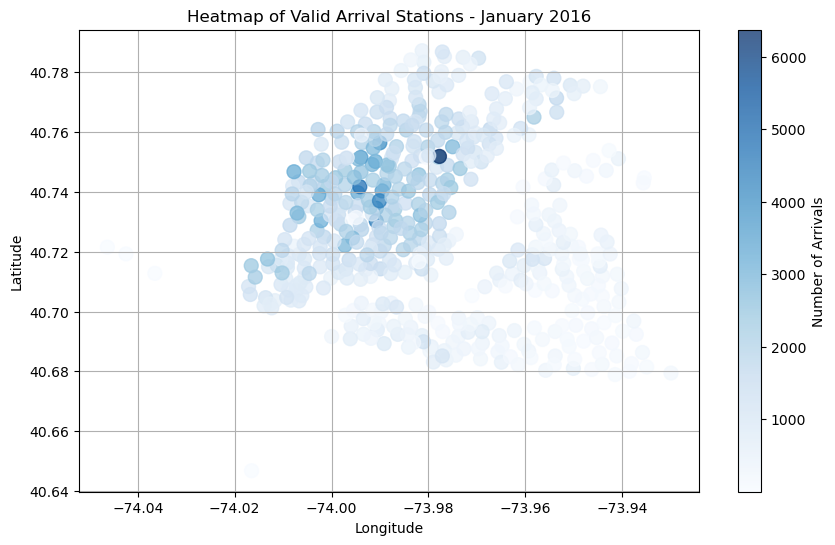

In [13]:
# Heatmap des arrivées (stations valides uniquement)
plt.figure(figsize=(10, 6))
plt.scatter(
    valid_arrival_counts['end station longitude'], 
    valid_arrival_counts['end station latitude'], 
    c=valid_arrival_counts['arrival_count'], 
    cmap='Blues', 
    s=100, 
    alpha=0.75
)
plt.colorbar(label='Number of Arrivals')
plt.title('Heatmap of Valid Arrival Stations - January 2016')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

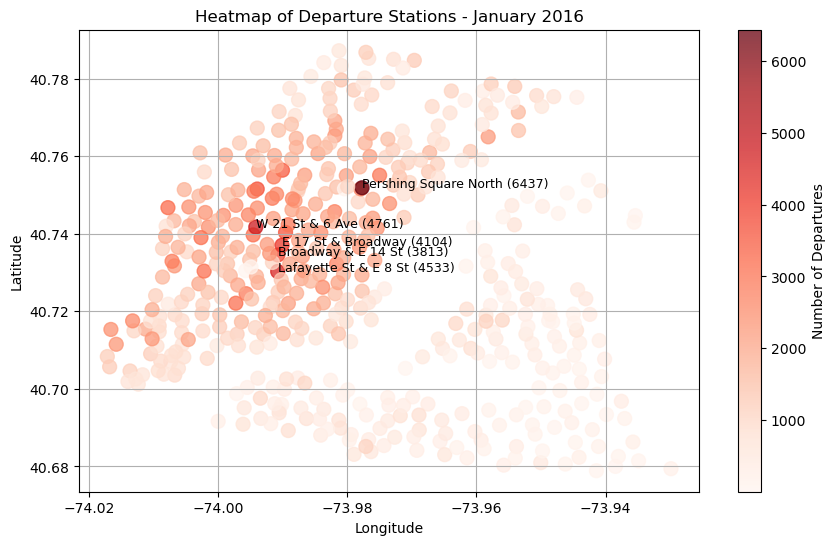

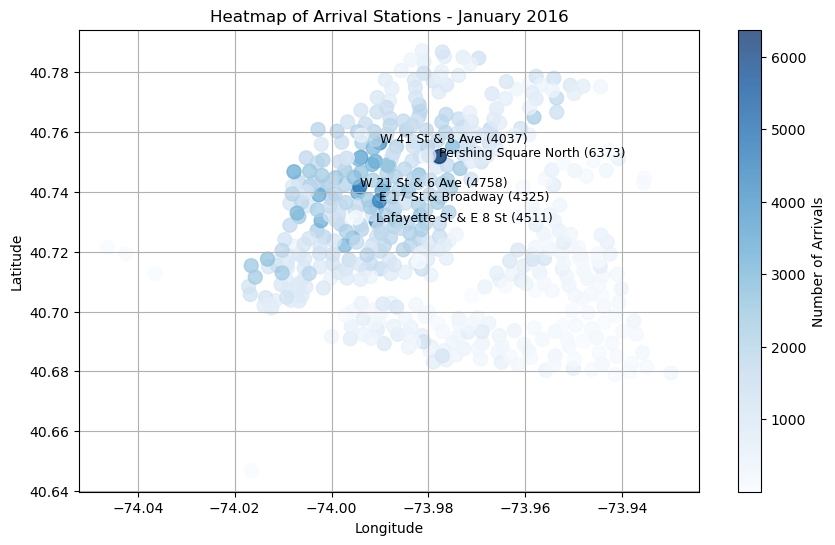

In [15]:
# Identifier les 5 stations les plus importantes pour les départs
top_departures = departure_counts.nlargest(5, 'departure_count').merge(
    data[['start station id', 'start station name']].drop_duplicates(), 
    left_on='start station id', 
    right_on='start station id'
)

# Identifier les 5 stations les plus importantes pour les arrivées
top_arrivals = valid_arrival_counts.nlargest(5, 'arrival_count').merge(
    data[['end station id', 'end station name']].drop_duplicates(), 
    left_on='end station id', 
    right_on='end station id'
)

# Heatmap pour les départs avec annotations des noms
plt.figure(figsize=(10, 6))
plt.scatter(
    departure_counts['start station longitude'], 
    departure_counts['start station latitude'], 
    c=departure_counts['departure_count'], 
    cmap='Reds', 
    s=100, 
    alpha=0.75
)
for _, row in top_departures.iterrows():
    plt.text(
        row['start station longitude'], 
        row['start station latitude'], 
        f"{row['start station name']} ({row['departure_count']})", 
        fontsize=9, color='black'
    )
plt.colorbar(label='Number of Departures')
plt.title('Heatmap of Departure Stations - January 2016')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Heatmap pour les arrivées avec annotations des noms
plt.figure(figsize=(10, 6))
plt.scatter(
    valid_arrival_counts['end station longitude'], 
    valid_arrival_counts['end station latitude'], 
    c=valid_arrival_counts['arrival_count'], 
    cmap='Blues', 
    s=100, 
    alpha=0.75
)
for _, row in top_arrivals.iterrows():
    plt.text(
        row['end station longitude'], 
        row['end station latitude'], 
        f"{row['end station name']} ({row['arrival_count']})", 
        fontsize=9, color='black'
    )
plt.colorbar(label='Number of Arrivals')
plt.title('Heatmap of Arrival Stations - January 2016')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

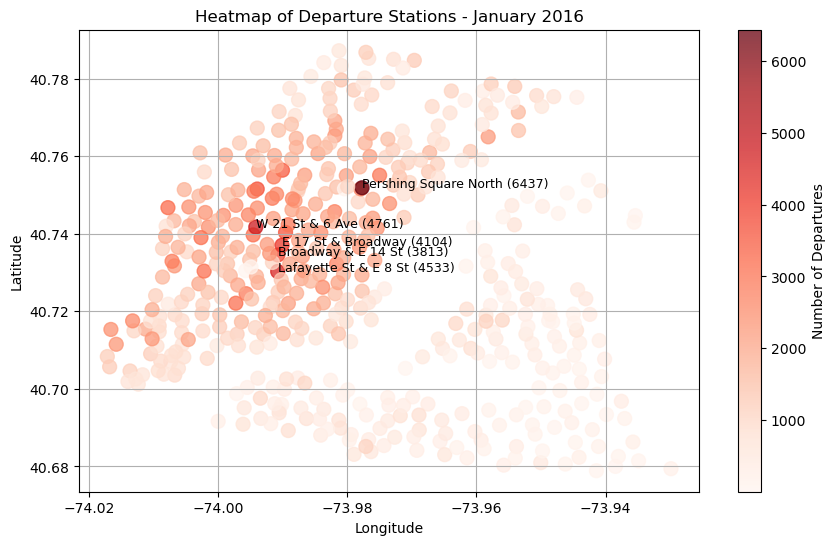

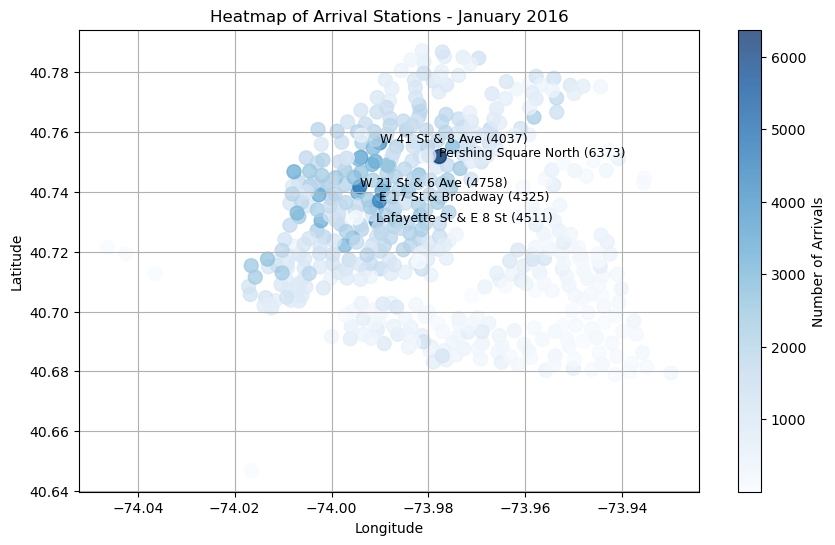

In [16]:
# Identifier les 5 stations les plus importantes pour les départs
top_departures = departure_counts.nlargest(5, 'departure_count').merge(
    data[['start station id', 'start station name']].drop_duplicates(), 
    left_on='start station id', 
    right_on='start station id'
)

# Identifier les 5 stations les plus importantes pour les arrivées
top_arrivals = valid_arrival_counts.nlargest(5, 'arrival_count').merge(
    data[['end station id', 'end station name']].drop_duplicates(), 
    left_on='end station id', 
    right_on='end station id'
)

# Heatmap pour les départs avec enregistrement
plt.figure(figsize=(10, 6))
plt.scatter(
    departure_counts['start station longitude'], 
    departure_counts['start station latitude'], 
    c=departure_counts['departure_count'], 
    cmap='Reds', 
    s=100, 
    alpha=0.75
)
for _, row in top_departures.iterrows():
    plt.text(
        row['start station longitude'], 
        row['start station latitude'], 
        f"{row['start station name']} ({row['departure_count']})", 
        fontsize=9, color='black'
    )
plt.colorbar(label='Number of Departures')
plt.title('Heatmap of Departure Stations - January 2016')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.savefig("heatmap_departures_january_2016.png")  # Enregistrer en PNG
plt.show()

# Heatmap pour les arrivées avec enregistrement
plt.figure(figsize=(10, 6))
plt.scatter(
    valid_arrival_counts['end station longitude'], 
    valid_arrival_counts['end station latitude'], 
    c=valid_arrival_counts['arrival_count'], 
    cmap='Blues', 
    s=100, 
    alpha=0.75
)
for _, row in top_arrivals.iterrows():
    plt.text(
        row['end station longitude'], 
        row['end station latitude'], 
        f"{row['end station name']} ({row['arrival_count']})", 
        fontsize=9, color='black'
    )
plt.colorbar(label='Number of Arrivals')
plt.title('Heatmap of Arrival Stations - January 2016')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.savefig("heatmap_arrivals_january_2016.png")  # Enregistrer en PNG
plt.show()